In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("flood_risk_dataset_india.csv")

In [3]:
df.head()

Latitude  Longitude  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0  18.861663  78.835584     218.999493         34.144337     43.912963   
1  35.570715  77.654451      55.353599         28.778774     27.585422   
2  29.227824  73.108463     103.991908         43.934956     30.108738   
3  25.361096  85.610733     198.984191         21.569354     34.453690   
4  12.524541  81.822101     144.626803         32.635692     36.292267   

   River Discharge (m³/s)  Water Level (m)  Elevation (m)    Land Cover  \
0             4236.182888         7.415552     377.465434    Water Body   
1             2472.585219         8.811019    7330.608875        Forest   
2              977.328053         4.631799    2205.873488  Agricultural   
3             3683.208933         2.891787    2512.277800        Desert   
4             2093.390678         3.188466    2001.818223  Agricultural   

  Soil Type  Population Density  Infrastructure  Historical Floods  \
0      Clay         7276.742184               1                  0   
1      Peat         6897.736956               0                  1   
2      Loam         4361.518494               1                  1   
3     Sandy         6163.069701               1                  1   
4      Loam         6167.964591               1                  0   

   Flood Occurred  
0               1  
1               0  
2               1  
3               0  
4               0

In [4]:
df.isnull().sum()

Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                10000 non-null  float64
 1   Longitude               10000 non-null  float64
 2   Rainfall (mm)           10000 non-null  float64
 3   Temperature (°C)        10000 non-null  float64
 4   Humidity (%)            10000 non-null  float64
 5   River Discharge (m³/s)  10000 non-null  float64
 6   Water Level (m)         10000 non-null  float64
 7   Elevation (m)           10000 non-null  float64
 8   Land Cover              10000 non-null  object 
 9   Soil Type               10000 non-null  object 
 10  Population Density      10000 non-null  float64
 11  Infrastructure          10000 non-null  int64  
 12  Historical Floods       10000 non-null  int64  
 13  Flood Occurred          10000 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memo

In [7]:
df.describe()

Latitude     Longitude  Rainfall (mm)  Temperature (°C)  \
count  10000.000000  10000.000000   10000.000000      10000.000000   
mean      22.330627     82.631366     150.015118         29.961401   
std        8.341274      8.389542      86.032127          8.669838   
min        8.000337     68.004575       0.014437         15.000166   
25%       15.143537     75.364428      76.124373         22.405717   
50%       22.283330     82.671007     150.620428         30.000907   
75%       29.460184     89.937897     223.402156         37.413488   
max       36.991813     96.997820     299.970293         44.993681   

       Humidity (%)  River Discharge (m³/s)  Water Level (m)  Elevation (m)  \
count  10000.000000            10000.000000     10000.000000   10000.000000   
mean      59.749104             2515.722946         5.017881    4417.138177   
std       23.142734             1441.706442         2.876579    2530.245421   
min       20.001339                0.042161         0.002701       1.150340   
25%       39.541778             1284.782376         2.538847    2229.681903   
50%       59.497375             2530.451944         5.042094    4417.199760   
75%       80.038163             3767.229861         7.524692    6616.729065   
max       99.997772             4999.698480         9.996899    8846.894877   

       Population Density  Infrastructure  Historical Floods  Flood Occurred  
count        10000.000000    10000.000000       10000.000000    10000.000000  
mean          5021.468442        0.502000           0.498700        0.505700  
std           2882.591520        0.500021           0.500023        0.499993  
min              2.289000        0.000000           0.000000        0.000000  
25%           2491.766601        0.000000           0.000000        0.000000  
50%           5074.392880        1.000000           0.000000        1.000000  
75%           7474.228752        1.000000           1.000000        1.000000  
max           9999.169530        1.000000           1.000000        1.000000

## Adding district and states and country using lattitude and longitude

In [8]:
'''from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm   # progress bar
import time

df = pd.read_csv("flood_risk_dataset_india.csv")

# Set up Nominatim with rate limit
geolocator = Nominatim(user_agent="my_flood_project_app_2025")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1.2, max_retries=2, error_wait_seconds=5.0)

# Function to get country, state, district
def get_location(lat, lon):
    try:
        location = reverse((lat, lon), language='en')
        if location and location.raw.get('address'):
            address = location.raw['address']
            country = address.get('country', None)
            state = address.get('state', None)
            # district field sometimes called 'county' or 'state_district'
            district = address.get('county', None) or address.get('state_district', None)
            return country, state, district
    except Exception as e:
        # Return None if error
        return None, None, None
    return None, None, None

# Try to resume progress if exists
try:
    df_processed = pd.read_csv('dataset_with_locations_progress.csv')
    print("Loaded existing progress.")
except FileNotFoundError:
    df_processed = df.copy()
    df_processed[['Country', 'State', 'District']] = None

# Process with progress bar
for i in tqdm(range(len(df_processed)), desc="Reverse Geocoding"):
    if pd.isna(df_processed.loc[i, 'Country']):  # skip already done rows
        lat = df_processed.loc[i, 'Latitude']
        lon = df_processed.loc[i, 'Longitude']
        country, state, district = get_location(lat, lon)
        df_processed.loc[i, 'Country'] = country
        df_processed.loc[i, 'State'] = state
        df_processed.loc[i, 'District'] = district

        # Save progress every 100 rows
        if i % 100 == 0 and i != 0:
            df_processed.to_csv('dataset_with_locations_progress.csv', index=False)

# Save final
df_processed.to_csv('dataset_with_country_state_district.csv', index=False)
print("✅ Done! Country, State and District columns added.")'''


'from geopy.geocoders import Nominatim\nfrom geopy.extra.rate_limiter import RateLimiter\nfrom tqdm import tqdm   # progress bar\nimport time\n\ndf = pd.read_csv("flood_risk_dataset_india.csv")\n\n# Set up Nominatim with rate limit\ngeolocator = Nominatim(user_agent="my_flood_project_app_2025")\nreverse = RateLimiter(geolocator.reverse, min_delay_seconds=1.2, max_retries=2, error_wait_seconds=5.0)\n\n# Function to get country, state, district\ndef get_location(lat, lon):\n    try:\n        location = reverse((lat, lon), language=\'en\')\n        if location and location.raw.get(\'address\'):\n            address = location.raw[\'address\']\n            country = address.get(\'country\', None)\n            state = address.get(\'state\', None)\n            # district field sometimes called \'county\' or \'state_district\'\n            district = address.get(\'county\', None) or address.get(\'state_district\', None)\n            return country, state, district\n    except Exception as e:\

## Reading new csv file with country states and districts

In [9]:
df = pd.read_csv('dataset_with_country_state_district.csv')
df.head()

Latitude  Longitude  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0  18.861663  78.835584     218.999493         34.144337     43.912963   
1  35.570715  77.654451      55.353599         28.778774     27.585422   
2  29.227824  73.108463     103.991908         43.934956     30.108738   
3  25.361096  85.610733     198.984191         21.569354     34.453690   
4  12.524541  81.822101     144.626803         32.635692     36.292267   

   River Discharge (m³/s)  Water Level (m)  Elevation (m)    Land Cover  \
0             4236.182888         7.415552     377.465434    Water Body   
1             2472.585219         8.811019    7330.608875        Forest   
2              977.328053         4.631799    2205.873488  Agricultural   
3             3683.208933         2.891787    2512.277800        Desert   
4             2093.390678         3.188466    2001.818223  Agricultural   

  Soil Type  Population Density  Infrastructure  Historical Floods  \
0      Clay         7276.742184               1                  0   
1      Peat         6897.736956               0                  1   
2      Loam         4361.518494               1                  1   
3     Sandy         6163.069701               1                  1   
4      Loam         6167.964591               1                  0   

   Flood Occurred Country      State          District  
0               1   India  Telangana  Medipalle mandal  
1               0   China   Xinjiang   Kargilik County  
2               1   India  Rajasthan   Anupgarh Tehsil  
3               0   India      Bihar           Harnaut  
4               0     NaN        NaN               NaN

In [10]:
df['Country'].value_counts()

Country
India          3586
China          1769
Pakistan        618
Myanmar         481
Bangladesh      174
Afghanistan     161
Nepal           155
Bhutan           45
Sri Lanka        42
Tajikistan        1
Name: count, dtype: int64

In [11]:
df.isnull().sum()

Latitude                     0
Longitude                    0
Rainfall (mm)                0
Temperature (°C)             0
Humidity (%)                 0
River Discharge (m³/s)       0
Water Level (m)              0
Elevation (m)                0
Land Cover                   0
Soil Type                    0
Population Density           0
Infrastructure               0
Historical Floods            0
Flood Occurred               0
Country                   2968
State                     3361
District                  3751
dtype: int64

## Taking only india as country

In [12]:
df = df[df['Country'] == "India"]

In [13]:
df.head()

Latitude  Longitude  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0  18.861663  78.835584     218.999493         34.144337     43.912963   
2  29.227824  73.108463     103.991908         43.934956     30.108738   
3  25.361096  85.610733     198.984191         21.569354     34.453690   
5  12.523841  93.105329     221.571312         36.006300     39.380945   
8  25.432335  90.125517     212.870315         35.607657     60.765855   

   River Discharge (m³/s)  Water Level (m)  Elevation (m)    Land Cover  \
0             4236.182888         7.415552     377.465434    Water Body   
2              977.328053         4.631799    2205.873488  Agricultural   
3             3683.208933         2.891787    2512.277800        Desert   
5             2973.137417         6.969483    7433.062836  Agricultural   
8             1867.752445         2.027741    7287.016909        Forest   

  Soil Type  Population Density  Infrastructure  Historical Floods  \
0      Clay         7276.742184               1                  0   
2      Loam         4361.518494               1                  1   
3     Sandy         6163.069701               1                  1   
5      Loam         5377.538809               0                  0   
8      Silt         6782.941225               0                  0   

   Flood Occurred Country      State          District  
0               1   India  Telangana  Medipalle mandal  
2               1   India  Rajasthan   Anupgarh Tehsil  
3               0   India      Bihar           Harnaut  
5               1   India        NaN               NaN  
8               0   India  Meghalaya          Gambegre

## taking only indian states

In [14]:
indian_states = [
    'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',
    'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka',
    'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
    'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
    'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
    'West Bengal', 'Delhi', 'Jammu and Kashmir', 'Ladakh'
]

df = df[df['State'].isin(indian_states)].reset_index(drop=True)




In [15]:
df['State'].value_counts()

State
Rajasthan            365
Maharashtra          326
Madhya Pradesh       325
Uttar Pradesh        245
Gujarat              221
Karnataka            188
Odisha               172
Andhra Pradesh       165
Chhattisgarh         152
Tamil Nadu           140
Telangana            124
Jharkhand             97
Bihar                 97
Assam                 87
Arunachal Pradesh     83
West Bengal           79
Himachal Pradesh      65
Ladakh                60
Punjab                51
Jammu and Kashmir     50
Haryana               49
Kerala                47
Uttarakhand           34
Manipur               26
Meghalaya             20
Nagaland              16
Mizoram               14
Tripura               11
Goa                    6
Sikkim                 5
Name: count, dtype: int64

In [16]:
df.shape

(3320, 17)

In [17]:
df.isnull().sum()

Latitude                   0
Longitude                  0
Rainfall (mm)              0
Temperature (°C)           0
Humidity (%)               0
River Discharge (m³/s)     0
Water Level (m)            0
Elevation (m)              0
Land Cover                 0
Soil Type                  0
Population Density         0
Infrastructure             0
Historical Floods          0
Flood Occurred             0
Country                    0
State                      0
District                  29
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.head(10)

Latitude  Longitude  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0  18.861663  78.835584     218.999493         34.144337     43.912963   
1  29.227824  73.108463     103.991908         43.934956     30.108738   
2  25.361096  85.610733     198.984191         21.569354     34.453690   
3  25.432335  90.125517     212.870315         35.607657     60.765855   
4  14.157834  77.647041      95.933187         36.564520     93.939027   
5  23.217937  74.963672     291.654891         18.082377     48.357780   
6  20.526406  70.923409     179.721453         34.841212     20.712469   
7  16.445645  75.546130      72.514120         23.737457     85.277769   
8  25.743734  73.134256      98.296509         43.541587     28.924746   
9  25.180022  86.963133      65.650403         24.610538     86.362340   

   River Discharge (m³/s)  Water Level (m)  Elevation (m)    Land Cover  \
0             4236.182888         7.415552     377.465434    Water Body   
1              977.328053         4.631799    2205.873488  Agricultural   
2             3683.208933         2.891787    2512.277800        Desert   
3             1867.752445         2.027741    7287.016909        Forest   
4             3138.637678         5.421321     543.271851        Desert   
5             3994.697746         0.545035    6919.070203    Water Body   
6             3038.203913         4.714103    5106.693174        Forest   
7             1585.457450         2.621817    7124.957067  Agricultural   
8             1781.464802         0.846184    3708.685583  Agricultural   
9              573.399126         3.824061    3378.029513        Desert   

  Soil Type  Population Density  Infrastructure  Historical Floods  \
0      Clay         7276.742184               1                  0   
1      Loam         4361.518494               1                  1   
2     Sandy         6163.069701               1                  1   
3      Silt         6782.941225               0                  0   
4      Silt         4965.927515               0                  1   
5      Loam         7144.881605               0                  1   
6      Peat         1427.409995               0                  0   
7      Loam         4120.450011               0                  0   
8     Sandy         3542.260975               0                  1   
9      Clay         4311.790655               1                  0   

   Flood Occurred Country           State          District  
0               1   India       Telangana  Medipalle mandal  
1               1   India       Rajasthan   Anupgarh Tehsil  
2               0   India           Bihar           Harnaut  
3               0   India       Meghalaya          Gambegre  
4               0   India  Andhra Pradesh         Penukonda  
5               1   India  Madhya Pradesh     Ratlam Tahsil  
6               1   India         Gujarat            Amreli  
7               0   India       Karnataka            Bilagi  
8               1   India       Rajasthan       Pali Tehsil  
9               0   India           Bihar        Jagdishpur

## EDA

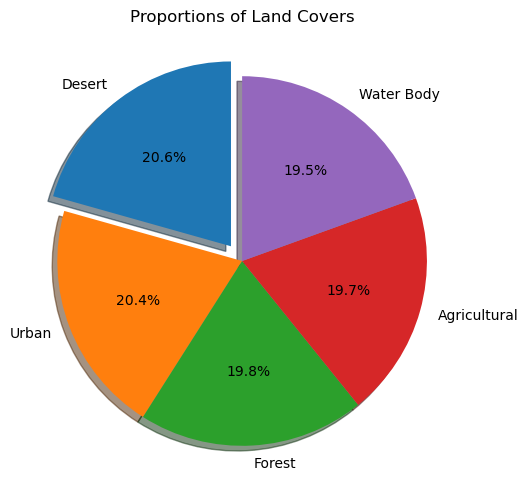

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

#1. Proportions of Land Cover
dflandcover=df['Land Cover']

count=dflandcover.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Land Covers')
plt.show()

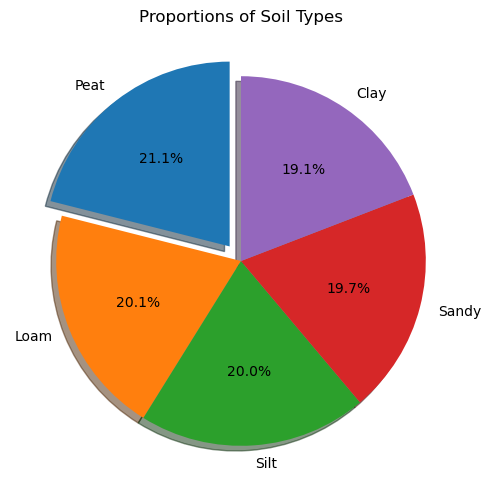

In [21]:
dfsoil=df['Soil Type']

count=dfsoil.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Soil Types')
plt.show()

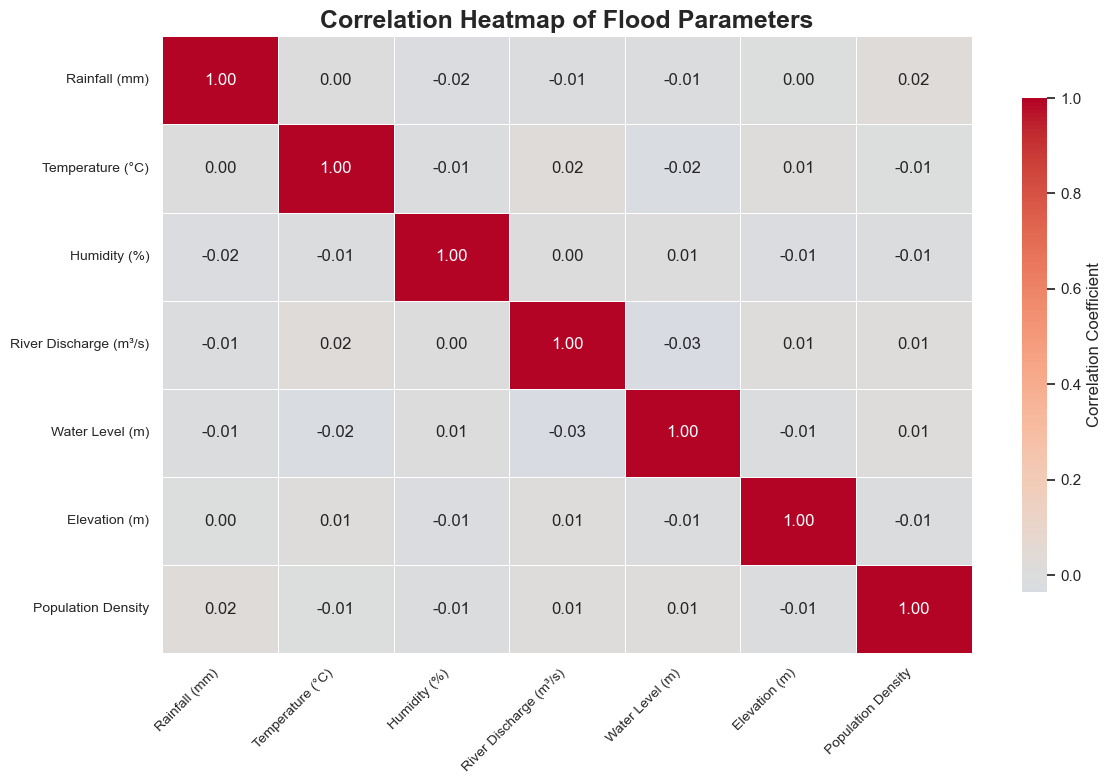

In [22]:
# correlation Heatmap
plt.figure(figsize=(12,8))
sns.set_theme(style="white")

number = df[['Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)',
             'River Discharge (m³/s)', 'Water Level (m)',
             'Elevation (m)', 'Population Density']]

# Compute correlation matrix
corr_matrix = number.corr()
plt.title("Correlation Heatmap of Flood Parameters", fontsize=18, fontweight='bold')


sns.heatmap(corr_matrix,
            annot=True,           # show correlation numbers
            fmt='.2f',            # decimal places
            cmap='coolwarm',      # color palette
            center=0,             # center color at zero
            linewidths=0.5,       # thin lines between cells
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'})  # colorbar styling

# Rotation of x and y axis
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add grid-like white frame
plt.gca().spines[:].set_visible(False)

plt.tight_layout()
plt.show()


## Count Flood Occurrences Vs. No Flood Occurrences

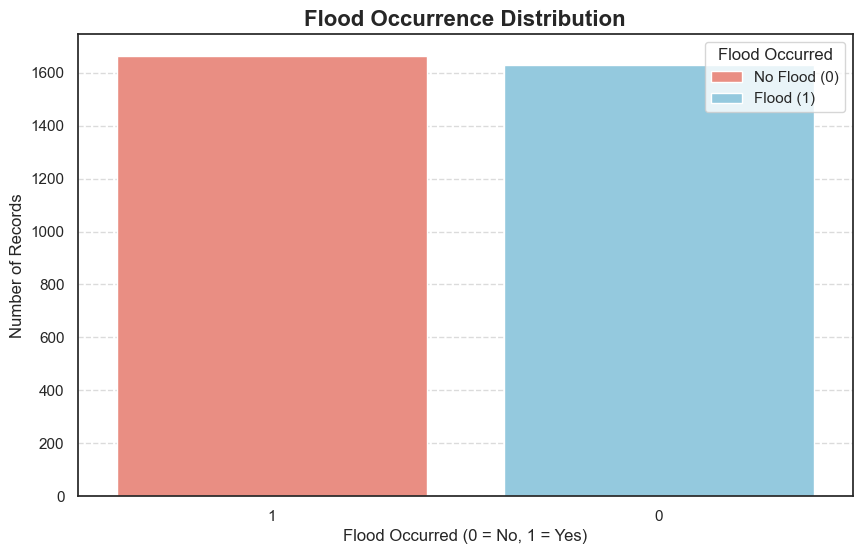

In [23]:
plt.figure(figsize=(10,6))

df['Flood Occurred'] = df['Flood Occurred'].astype(str)
palette = {'0': 'skyblue', '1': 'salmon'}
sns.countplot(x='Flood Occurred', data=df, hue='Flood Occurred', palette=palette)

# Labels and title
plt.xlabel('Flood Occurred (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.title('Flood Occurrence Distribution', fontsize=16, fontweight='bold')

# Add legend with custom labels
plt.legend(title='Flood Occurred', labels=['No Flood (0)', 'Flood (1)'])

# Show grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


## Count of historic Flood occurence vs No historic Flood occurence

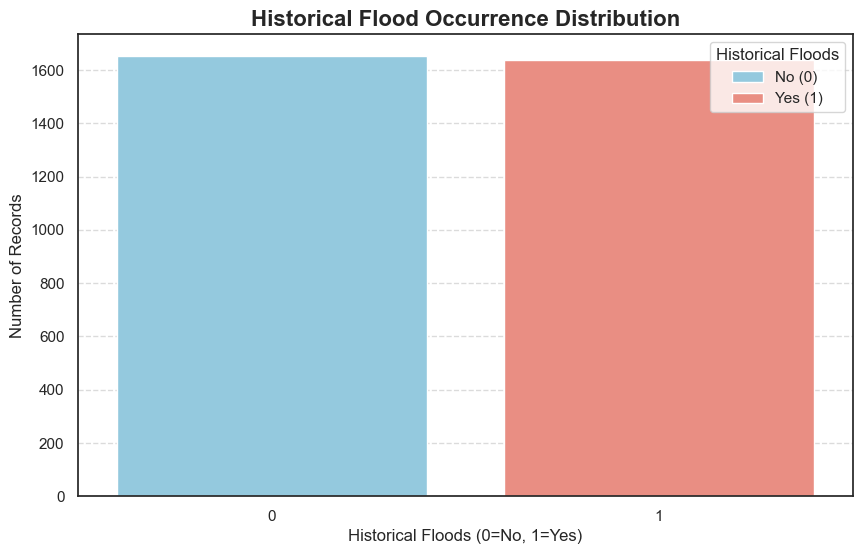

In [24]:

# column is string for coloring
df['Historical Floods'] = df['Historical Floods'].astype(str)

plt.figure(figsize=(10,6))
palette = {'0':'skyblue', '1':'salmon'}

sns.countplot(x='Historical Floods', data=df, hue='Historical Floods', palette=palette)

# Labels and title
plt.xlabel('Historical Floods (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.title('Historical Flood Occurrence Distribution', fontsize=16, fontweight='bold')

# Add legend with custom labels
plt.legend(title='Historical Floods', labels=['No (0)', 'Yes (1)'])

# Optional: grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


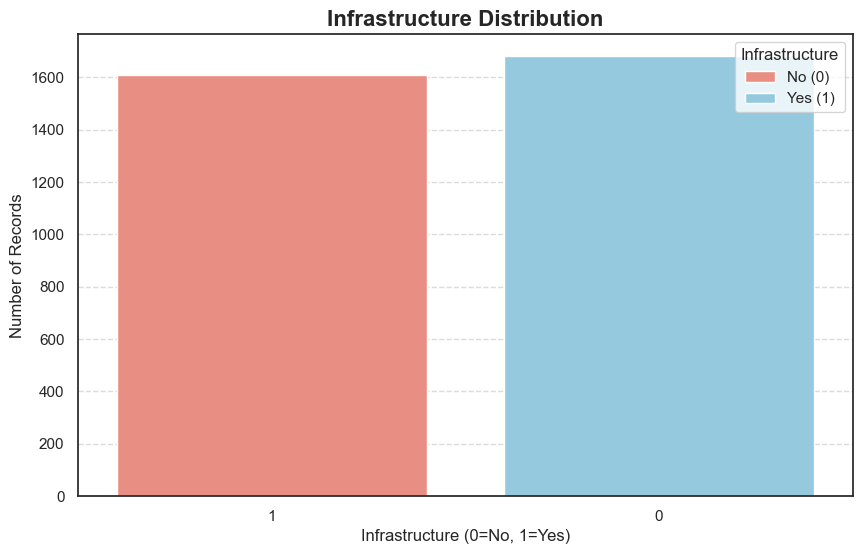

In [25]:

# column is string for coloring
df['Infrastructure'] = df['Infrastructure'].astype(str)

plt.figure(figsize=(10,6))
palette = {'0':'skyblue', '1':'salmon'}

sns.countplot(x='Infrastructure', data=df, hue='Infrastructure', palette=palette)

# Labels and title
plt.xlabel('Infrastructure (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.title('Infrastructure Distribution', fontsize=16, fontweight='bold')

# Add legend with custom labels
plt.legend(title='Infrastructure', labels=['No (0)', 'Yes (1)'])

# Optional: grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


## Top 5 states for most floods

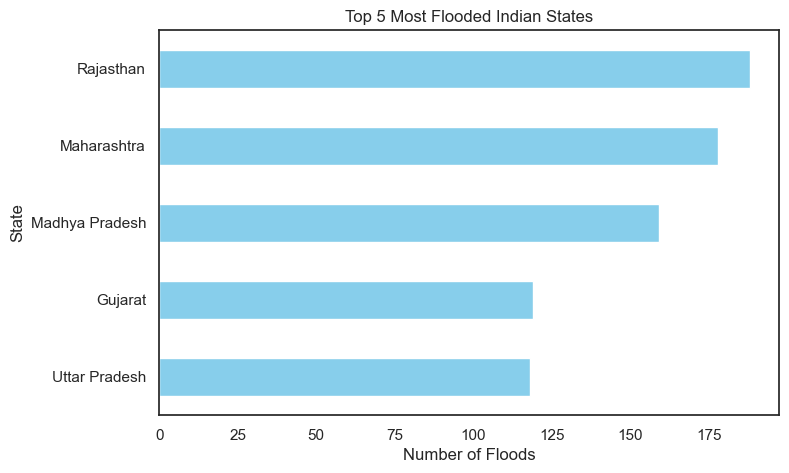

In [26]:
# Top 5 states
df['Flood Occurred'] = df['Flood Occurred'].astype(int)
top5_states = df[df['Flood Occurred'] == 1]['State'].value_counts().head(5)

# Plot horizontal bar chart
top5_states.plot(kind='barh', color='skyblue', figsize=(8,5))
plt.xlabel('Number of Floods')
plt.ylabel('State')
plt.title('Top 5 Most Flooded Indian States')
plt.gca().invert_yaxis()  # highest on top
plt.show()

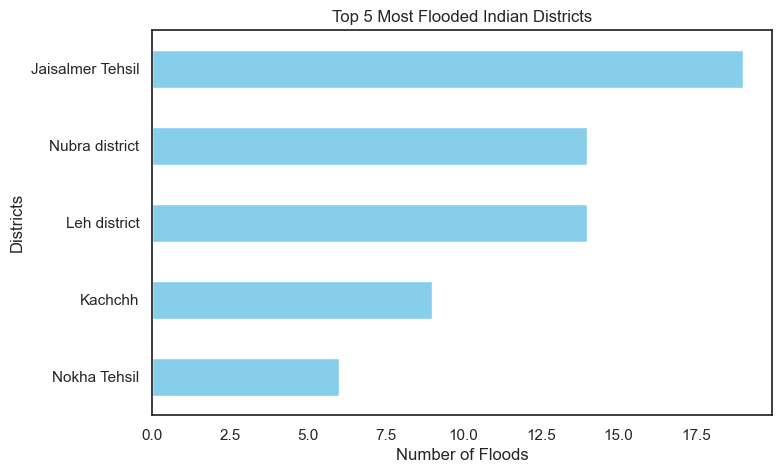

In [27]:
# Top 5 Districts
top5_district = df[df['Flood Occurred'] == 1]['District'].value_counts().head(5)

# Plot horizontal bar chart
top5_district.plot(kind='barh', color='skyblue', figsize=(8,5))
plt.xlabel('Number of Floods')
plt.ylabel('Districts')
plt.title('Top 5 Most Flooded Indian Districts')
plt.gca().invert_yaxis()  # highest on top
plt.show()

In [28]:
# showing top 5 districts of a user specified state

def plot_top5_districts(df, state_name):

    state_flooded = df[(df['State'] == state_name) & (df['Flood Occurred'] == 1)]
    
    # Check if there are flooded records
    if not state_flooded.empty:
        top5_districts = state_flooded['District'].value_counts().head(5)
        
        # plotting chart
        top5_districts.plot(kind='barh', color='skyblue', figsize=(8,5))
        plt.xlabel('Number of Floods')
        plt.ylabel('District')
        plt.title(f'Top 5 Most Flooded Districts in {state_name}')
        plt.gca().invert_yaxis()  # highest on top
        plt.show()
    else:
        print(f"No flooded records found in {state_name}")


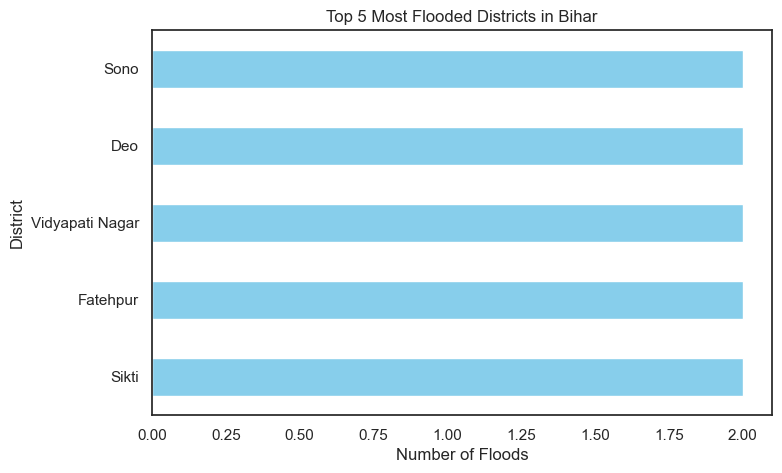

In [29]:
plot_top5_districts(df, "Bihar")

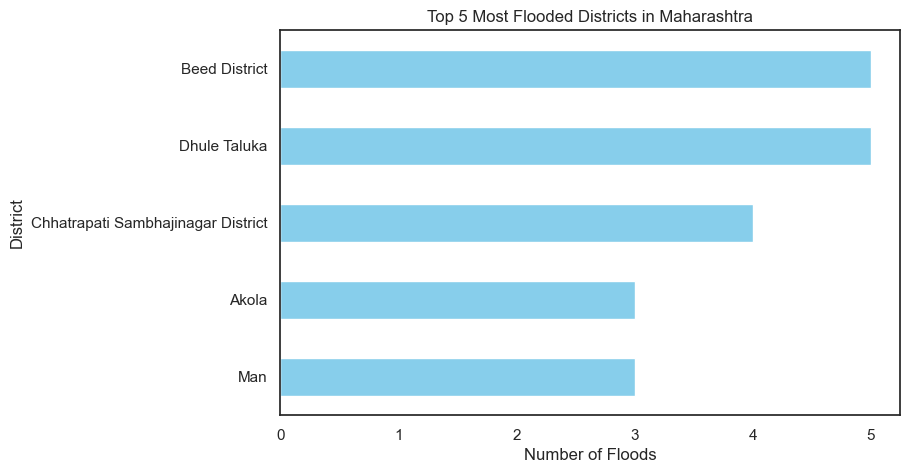

In [30]:
plot_top5_districts(df, "Maharashtra")

In [31]:
plot_top5_districts(df, "jammu")

No flooded records found in jammu


In [32]:
import folium
from folium.plugins import MarkerCluster

# Make sure 'Flood Occurred' is int
df['Flood Occurred'] = df['Flood Occurred'].astype(int)

# Center map on India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Optional: cluster nearby points
marker_cluster = MarkerCluster().add_to(m)

# Plot each record
for idx, row in df.iterrows():
    # Choose color based on flood occurrence
    color = 'red' if row['Flood Occurred'] == 1 else 'blue'
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"State: {row['State']}<br>District: {row['District']}<br>Flood: {row['Flood Occurred']}"
    ).add_to(marker_cluster)

# Display map
m


In [33]:
print("Map Of All Places Where Floods Occured and The Precipitation is Higher Than 200 mm")
precipitation_threshold = 200

high_precipitation_data = df[(df['Rainfall (mm)'] > precipitation_threshold) & (df['Flood Occurred'] == 1)]


map_center = [high_precipitation_data['Latitude'].mean(), high_precipitation_data['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=5)

marker_cluster = MarkerCluster().add_to(my_map)

for _, row in high_precipitation_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Rainfall: {row['Rainfall (mm)']} mm, Temp: {row['Temperature (°C)']} °C, Humidity: {row['Humidity (%)']}%, Water Level: {row['Water Level (m)']}, Elevation: {row['Elevation (m)']}"
    ).add_to(marker_cluster)
my_map

Map Of All Places Where Floods Occured and The Precipitation is Higher Than 200 mm


In [34]:
print("Map Of All Places Where Floods Didn't Occur and The Precipitation is Higher Than 200 mm")

precipitation_threshold = 200


high_precipitation_data = df[(df['Rainfall (mm)'] > precipitation_threshold) & (df['Flood Occurred'] == 0)]


map_center = [high_precipitation_data['Latitude'].mean(), high_precipitation_data['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=5)

marker_cluster = MarkerCluster().add_to(my_map)

for _, row in high_precipitation_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Rainfall: {row['Rainfall (mm)']} mm, Temp: {row['Temperature (°C)']} °C, Humidity: {row['Humidity (%)']}%, Water Level: {row['Water Level (m)']}, Elevation: {row['Elevation (m)']}"
    ).add_to(marker_cluster)

my_map

Map Of All Places Where Floods Didn't Occur and The Precipitation is Higher Than 200 mm


In [35]:
from folium.plugins import HeatMap
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

# --- Brightness Control ---
# Instead of dividing by max_density directly, divide by a factor > max_density
# This reduces intensity and makes map lighter
max_density = df['Population Density'].max()
brightness_factor = max_density * 5
  # adjust: 2 = lighter, 3 = even lighter

heat_data = [
    [row['Latitude'], row['Longitude'], row['Population Density'] / brightness_factor]
    for index, row in df.iterrows()
]

# Add HeatMap layer
HeatMap(
    heat_data,
    radius=20,    # bigger radius smooths out
    blur=15,      # smoother edges
    max_zoom=1,
    min_opacity=0.2   # ensures lighter areas visible
).add_to(m)

# Show map in Jupyter
display(m)


In [36]:
df_flood = df[df['Flood Occurred'] == 1]

# Create base map centered on India
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

# Prepare heatmap data (weights optional)
# Here we use Population Density as weight, but you can also use 1 for each occurrence.
max_density = df_flood['Population Density'].max()
brightness_factor = max_density * 2  # adjust to control brightness

heat_data = [
    [row['Latitude'], row['Longitude'], row['Population Density'] / brightness_factor]
    for index, row in df_flood.iterrows()
]

# Add HeatMap layer
HeatMap(
    heat_data,
    radius=20,    # adjust for smoothness
    blur=15,
    max_zoom=1,
    min_opacity=0.2
).add_to(m)

# Show map in Jupyter Notebook
display(m)


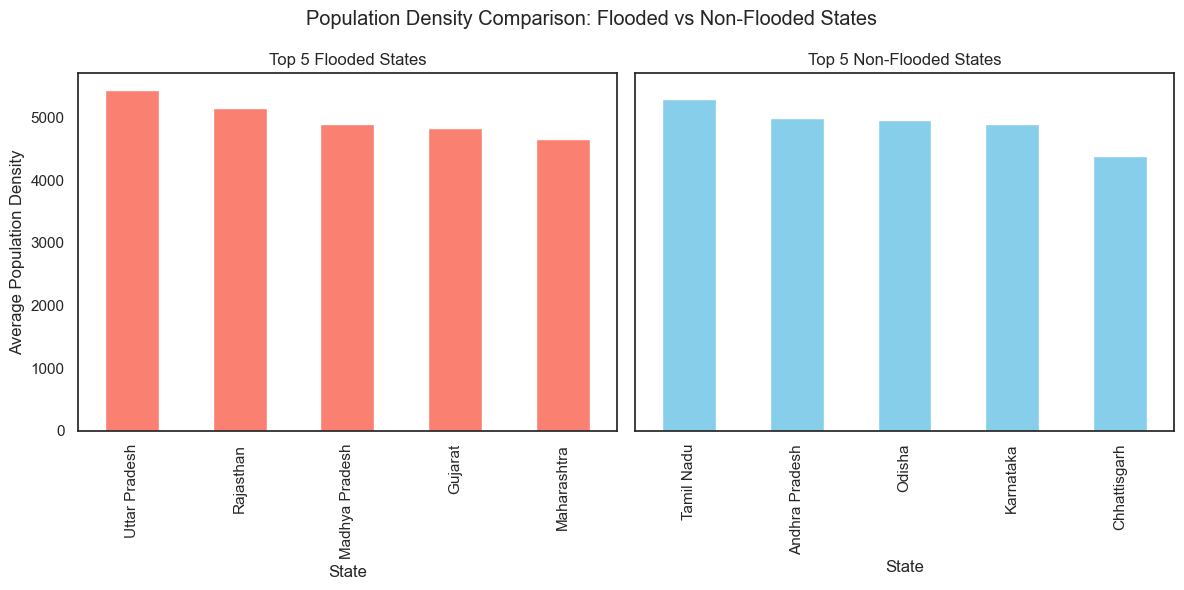

In [37]:
flood_df = df[df['Flood Occurred'] == 1]
noflood_df = df[df['Flood Occurred'] == 0]

# Select top 5 flooded states (by number of flood events)
top5_flood_states = flood_df['State'].value_counts().head(5).index

# Select top 5 non-flooded states (exclude flooded top 5)
top5_noflood_states = [s for s in noflood_df['State'].value_counts().index if s not in top5_flood_states][:5]

# Filter datasets
flood_df_top5 = flood_df[flood_df['State'].isin(top5_flood_states)]
noflood_df_top5 = noflood_df[noflood_df['State'].isin(top5_noflood_states)]

# Calculate average population density
flood_pop = flood_df_top5.groupby('State')['Population Density'].mean().sort_values(ascending=False)
noflood_pop = noflood_df_top5.groupby('State')['Population Density'].mean().sort_values(ascending=False)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True)

flood_pop.plot(kind='bar', color='salmon', ax=axes[0])
axes[0].set_title('Top 5 Flooded States')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Average Population Density')

noflood_pop.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Top 5 Non-Flooded States')
axes[1].set_xlabel('State')

plt.suptitle('Population Density Comparison: Flooded vs Non-Flooded States')
plt.tight_layout()
plt.show()


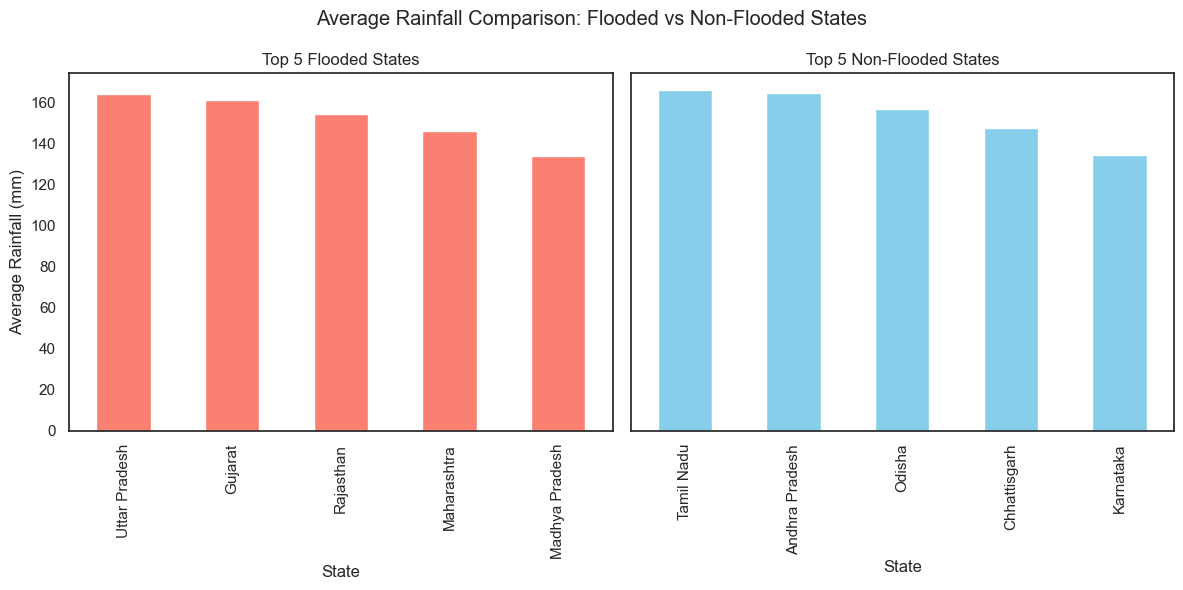

In [38]:
flood_df_top5 = flood_df[flood_df['State'].isin(top5_flood_states)]
noflood_df_top5 = noflood_df[noflood_df['State'].isin(top5_noflood_states)]

# Calculate average rainfall
flood_rain = flood_df_top5.groupby('State')['Rainfall (mm)'].mean().sort_values(ascending=False)
noflood_rain = noflood_df_top5.groupby('State')['Rainfall (mm)'].mean().sort_values(ascending=False)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True)

flood_rain.plot(kind='bar', color='salmon', ax=axes[0])
axes[0].set_title('Top 5 Flooded States')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Average Rainfall (mm)')

noflood_rain.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Top 5 Non-Flooded States')
axes[1].set_xlabel('State')

plt.suptitle('Average Rainfall Comparison: Flooded vs Non-Flooded States')
plt.tight_layout()
plt.show()


C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_14168\2425275698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Soil Type', y='Population Density', data=df,palette='Blues')


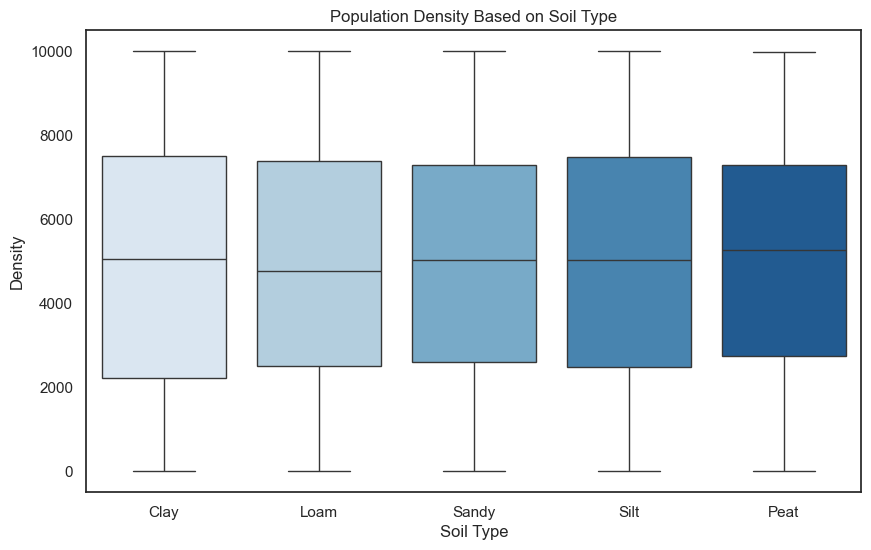

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Soil Type', y='Population Density', data=df,palette='Blues')
plt.title('Population Density Based on Soil Type')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Soil Type')
plt.ylabel('Density')
plt.show()

C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_14168\3968364421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Land Cover', y='Rainfall (mm)', data=df,palette='Blues')


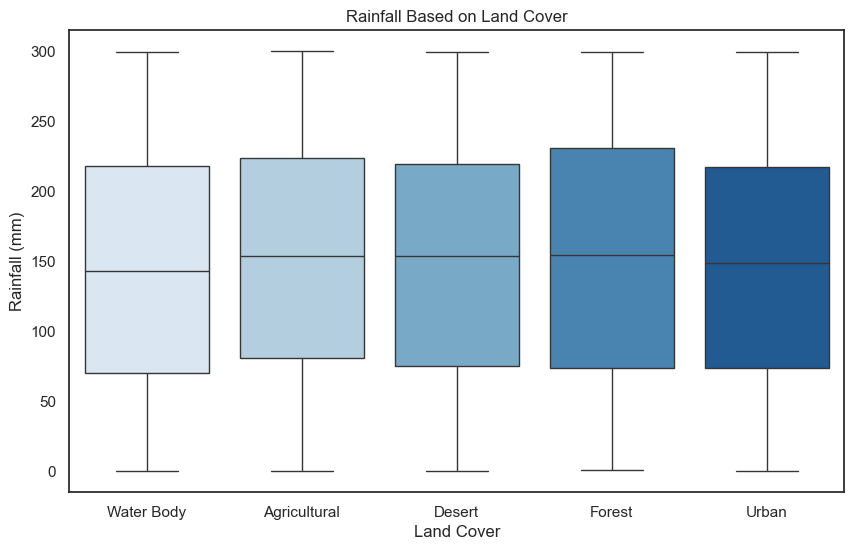

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Land Cover', y='Rainfall (mm)', data=df,palette='Blues')
plt.title('Rainfall Based on Land Cover')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Land Cover')
plt.ylabel('Rainfall (mm)')
plt.show()

C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_14168\88492297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Soil Type', y='Rainfall (mm)', data=df,palette='Blues')


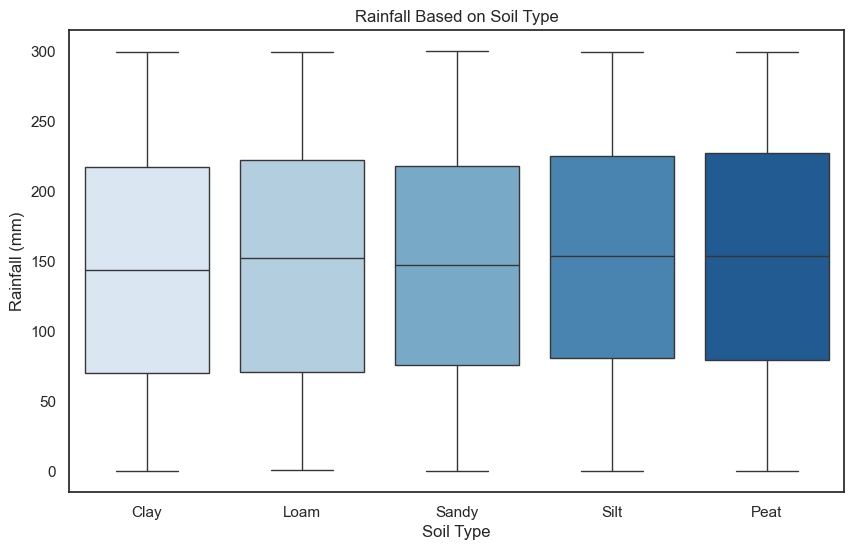

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Soil Type', y='Rainfall (mm)', data=df,palette='Blues')
plt.title('Rainfall Based on Soil Type')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Soil Type')
plt.ylabel('Rainfall (mm)')
plt.show()

In [42]:
df = pd.read_csv('flood_risk_dataset_india.csv')
df.head()


Latitude  Longitude  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0  18.861663  78.835584     218.999493         34.144337     43.912963   
1  35.570715  77.654451      55.353599         28.778774     27.585422   
2  29.227824  73.108463     103.991908         43.934956     30.108738   
3  25.361096  85.610733     198.984191         21.569354     34.453690   
4  12.524541  81.822101     144.626803         32.635692     36.292267   

   River Discharge (m³/s)  Water Level (m)  Elevation (m)    Land Cover  \
0             4236.182888         7.415552     377.465434    Water Body   
1             2472.585219         8.811019    7330.608875        Forest   
2              977.328053         4.631799    2205.873488  Agricultural   
3             3683.208933         2.891787    2512.277800        Desert   
4             2093.390678         3.188466    2001.818223  Agricultural   

  Soil Type  Population Density  Infrastructure  Historical Floods  \
0      Clay         7276.742184               1                  0   
1      Peat         6897.736956               0                  1   
2      Loam         4361.518494               1                  1   
3     Sandy         6163.069701               1                  1   
4      Loam         6167.964591               1                  0   

   Flood Occurred  
0               1  
1               0  
2               1  
3               0  
4               0

In [43]:
# Make a copy to be safe
df = df.copy()

# Normalized hydrological & related features
df['Rain_norm'] = df['Rainfall (mm)'] / df['Rainfall (mm)'].max()
df['Temp_norm'] = df['Temperature (°C)'] / df['Temperature (°C)'].max()
df['Hum_norm']  = df['Humidity (%)'] / df['Humidity (%)'].max()

df['Dis_norm']  = df['River Discharge (m³/s)'] / df['River Discharge (m³/s)'].max()
df['WL_norm']   = df['Water Level (m)'] / df['Water Level (m)'].max()

df['Elev_norm'] = df['Elevation (m)'] / df['Elevation (m)'].max()
df['Pop_norm']  = df['Population Density'] / df['Population Density'].max()

df[['Rain_norm','Temp_norm','Hum_norm','Dis_norm','WL_norm','Elev_norm','Pop_norm']].head()


Rain_norm  Temp_norm  Hum_norm  Dis_norm   WL_norm  Elev_norm  Pop_norm
0   0.730071   0.758870  0.439139  0.847288  0.741785   0.042666  0.727735
1   0.184530   0.639618  0.275860  0.494547  0.881375   0.828608  0.689831
2   0.346674   0.976469  0.301094  0.195477  0.463324   0.249339  0.436188
3   0.663346   0.479386  0.344545  0.736686  0.289268   0.283973  0.616358
4   0.482137   0.725339  0.362931  0.418703  0.318945   0.226274  0.616848

In [44]:
# One-hot encode categorical features
df = pd.get_dummies(
    df,
    columns=['Land Cover', 'Soil Type', 'Infrastructure'],
    drop_first=True  # avoids dummy trap
)

print("Columns after encoding:\n", df.columns)


Columns after encoding:
 Index(['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)',
       'Humidity (%)', 'River Discharge (m³/s)', 'Water Level (m)',
       'Elevation (m)', 'Population Density', 'Historical Floods',
       'Flood Occurred', 'Rain_norm', 'Temp_norm', 'Hum_norm', 'Dis_norm',
       'WL_norm', 'Elev_norm', 'Pop_norm', 'Land Cover_Desert',
       'Land Cover_Forest', 'Land Cover_Urban', 'Land Cover_Water Body',
       'Soil Type_Loam', 'Soil Type_Peat', 'Soil Type_Sandy', 'Soil Type_Silt',
       'Infrastructure_1'],
      dtype='object')


In [45]:
# Hydrological risk score (based on normalized rain, discharge, water level, humidity)
df['Hydro_Risk'] = (
    df['Rain_norm'] * 0.35 +
    df['Dis_norm']  * 0.30 +
    df['WL_norm']   * 0.25 +
    df['Hum_norm']  * 0.10
)

# Terrain vulnerability (low elevation + high population density)
df['Terrain_Risk'] = (1 - df['Elev_norm']) * 0.6 + (df['Pop_norm'] * 0.4)

# Historical flood influence
df['History_Risk'] = df['Historical Floods'] / df['Historical Floods'].max()

# Final combined flood risk score
df['Flood_Risk_Score'] = (
    df['Hydro_Risk']   * 0.5 +
    df['Terrain_Risk'] * 0.3 +
    df['History_Risk'] * 0.2
)

df[['Hydro_Risk', 'Terrain_Risk', 'History_Risk', 'Flood_Risk_Score']].head()


Hydro_Risk  Terrain_Risk  History_Risk  Flood_Risk_Score
0    0.739071      0.865494           0.0          0.629184
1    0.460879      0.378768           1.0          0.544070
2    0.325919      0.624872           1.0          0.550421
3    0.559949      0.676160           1.0          0.682822
4    0.410388      0.710975           0.0          0.418487

In [46]:
# Choose a dynamic threshold (median of risk score)
threshold = df['Flood_Risk_Score'].median()

# New target variable based on engineered risk
df['Flood_Occurred_Updated'] = (df['Flood_Risk_Score'] > threshold).astype(int)

df[['Flood_Risk_Score', 'Flood Occurred', 'Flood_Occurred_Updated']].head()


Flood_Risk_Score  Flood Occurred  Flood_Occurred_Updated
0          0.629184               1                       1
1          0.544070               0                       1
2          0.550421               1                       1
3          0.682822               0                       1
4          0.418487               0                       0

In [47]:
# Correlation matrix (numeric only)
corr = df.corr(numeric_only=True)

print("Correlation with Flood_Occurred_Updated:\n")
print(corr['Flood_Occurred_Updated'].sort_values(ascending=False))


Correlation with Flood_Occurred_Updated:

Flood_Occurred_Updated    1.000000
Flood_Risk_Score          0.823158
Historical Floods         0.669802
History_Risk              0.669802
Hydro_Risk                0.376671
Terrain_Risk              0.307473
Rain_norm                 0.252283
Rainfall (mm)             0.252283
River Discharge (m³/s)    0.210580
Dis_norm                  0.210580
WL_norm                   0.167669
Water Level (m)           0.167669
Population Density        0.165589
Pop_norm                  0.165589
Hum_norm                  0.067290
Humidity (%)              0.067290
Land Cover_Desert         0.018636
Flood Occurred            0.011801
Soil Type_Loam            0.006535
Longitude                 0.005539
Infrastructure_1         -0.000800
Latitude                 -0.000999
Land Cover_Forest        -0.001249
Land Cover_Water Body    -0.004462
Soil Type_Silt           -0.004464
Soil Type_Peat           -0.005943
Land Cover_Urban         -0.009108
Soil Type_San

In [48]:
import pandas as pd
import numpy as np

# ML + evaluation imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB



print("Columns in df:\n", df.columns)


Columns in df:
 Index(['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)',
       'Humidity (%)', 'River Discharge (m³/s)', 'Water Level (m)',
       'Elevation (m)', 'Population Density', 'Historical Floods',
       'Flood Occurred', 'Rain_norm', 'Temp_norm', 'Hum_norm', 'Dis_norm',
       'WL_norm', 'Elev_norm', 'Pop_norm', 'Land Cover_Desert',
       'Land Cover_Forest', 'Land Cover_Urban', 'Land Cover_Water Body',
       'Soil Type_Loam', 'Soil Type_Peat', 'Soil Type_Sandy', 'Soil Type_Silt',
       'Infrastructure_1', 'Hydro_Risk', 'Terrain_Risk', 'History_Risk',
       'Flood_Risk_Score', 'Flood_Occurred_Updated'],
      dtype='object')


In [49]:
# Define target
target_col = 'Flood_Occurred_Updated'

# Drop target + original flood label from features if present
drop_cols = [c for c in ['Flood_Occurred_Updated', 'Flood Occurred'] if c in df.columns]

X = df.drop(columns=drop_cols)
y = df[target_col]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Feature shape: (10000, 30)
Target shape: (10000,)
Train size: (8000, 30) Test size: (2000, 30)


In [50]:
models = {}

# 1. Logistic Regression
models['Logistic Regression'] = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

# 2. K-Nearest Neighbors
models['KNN'] = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)
)

# 3. Support Vector Machine (RBF)
models['SVC (RBF)'] = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf')
)

# 4. Linear SVM
models['Linear SVC'] = make_pipeline(
    StandardScaler(),
    LinearSVC()
)

# 5. Gaussian Naive Bayes
models['Gaussian NB'] = make_pipeline(
    StandardScaler(),
    GaussianNB()
)

# 6. Decision Tree
models['Decision Tree'] = DecisionTreeClassifier(
    max_depth=None,
    random_state=42
)

# 7. Random Forest
models['Random Forest'] = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

# 8. Gradient Boosting
models['Gradient Boosting'] = GradientBoostingClassifier(
    random_state=42
)

# 9. Extra Trees
models['Extra Trees'] = ExtraTreesClassifier(
    n_estimators=200,
    random_state=42
)

# Optional: XGBoost if installed
try:
    from xgboost import XGBClassifier
    models['XGBoost'] = XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss'
    )
    print("XGBoost added.")
except ImportError:
    print("XGBoost not installed. Skipping XGBoost model.")


XGBoost added.


In [51]:
results = []

for name, model in models.items():
    print(f"\nTraining: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"Accuracy: {acc:.4f}")

# Sort results by accuracy
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

print("\n\n=== Model Accuracy Summary (High to Low) ===")
for name, acc in results_sorted:
    print(f"{name:20s} : {acc:.4f}")



Training: Logistic Regression
Accuracy: 0.9955

Training: KNN
Accuracy: 0.9285

Training: SVC (RBF)
Accuracy: 0.9815

Training: Linear SVC
Accuracy: 0.9970

Training: Gaussian NB
Accuracy: 0.9480

Training: Decision Tree
Accuracy: 0.9995

Training: Random Forest
Accuracy: 0.9995

Training: Gradient Boosting
Accuracy: 0.9995

Training: Extra Trees
Accuracy: 0.9845

Training: XGBoost
Accuracy: 0.9990


=== Model Accuracy Summary (High to Low) ===
Decision Tree        : 0.9995
Random Forest        : 0.9995
Gradient Boosting    : 0.9995
XGBoost              : 0.9990
Linear SVC           : 0.9970
Logistic Regression  : 0.9955
Extra Trees          : 0.9845
SVC (RBF)            : 0.9815
Gaussian NB          : 0.9480
KNN                  : 0.9285


In [52]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# Load your original dataset (with all columns)
df = pd.read_csv("flood_risk_dataset_india.csv")   # change name if needed
print("Data shape:", df.shape)

# ---- Compute params for feature engineering from full data ----
fe_params = {
    'Rain_max': df['Rainfall (mm)'].max(),
    'Temp_max': df['Temperature (°C)'].max(),
    'Hum_max': df['Humidity (%)'].max(),
    'Dis_max': df['River Discharge (m³/s)'].max(),
    'WL_max' : df['Water Level (m)'].max(),
    'Elev_max': df['Elevation (m)'].max(),
    'Pop_max': df['Population Density'].max(),
    'Hist_max': df['Historical Floods'].max()
}

def engineer_features(df_in, fe_params):
    """
    Takes a dataframe with raw inputs:
    ['Rainfall (mm)','Temperature (°C)','Humidity (%)',
     'River Discharge (m³/s)','Water Level (m)','Elevation (m)',
     'Land Cover','Soil Type','Population Density',
     'Infrastructure','Historical Floods', ...]
     
    Returns dataframe with normalized & risk features added.
    """
    df = df_in.copy()

    # Normalized columns using TRAINING max values
    df['Rain_norm'] = df['Rainfall (mm)'] / fe_params['Rain_max']
    df['Temp_norm'] = df['Temperature (°C)'] / fe_params['Temp_max']
    df['Hum_norm']  = df['Humidity (%)'] / fe_params['Hum_max']
    df['Dis_norm']  = df['River Discharge (m³/s)'] / fe_params['Dis_max']
    df['WL_norm']   = df['Water Level (m)'] / fe_params['WL_max']
    df['Elev_norm'] = df['Elevation (m)'] / fe_params['Elev_max']
    df['Pop_norm']  = df['Population Density'] / fe_params['Pop_max']

    # Risk features
    df['Hydro_Risk'] = (
        df['Rain_norm'] * 0.35 +
        df['Dis_norm']  * 0.30 +
        df['WL_norm']   * 0.25 +
        df['Hum_norm']  * 0.10
    )

    df['Terrain_Risk'] = (1 - df['Elev_norm']) * 0.6 + (df['Pop_norm'] * 0.4)

    df['History_Risk'] = df['Historical Floods'] / fe_params['Hist_max']

    df['Flood_Risk_Score'] = (
        df['Hydro_Risk']   * 0.5 +
        df['Terrain_Risk'] * 0.3 +
        df['History_Risk'] * 0.2
    )

    return df


Data shape: (10000, 14)


In [53]:
# 1) Apply feature engineering on full dataset
df_fe = engineer_features(df, fe_params)

# 2) Create updated target from Flood_Risk_Score (same logic as before)
threshold = df_fe['Flood_Risk_Score'].median()
df_fe['Flood_Occurred_Updated'] = (df_fe['Flood_Risk_Score'] > threshold).astype(int)

# 3) One-hot encode categoricals
df_fe = pd.get_dummies(
    df_fe,
    columns=['Land Cover', 'Soil Type', 'Infrastructure'],
    drop_first=True
)

# 4) Define X, y
target_col = 'Flood_Occurred_Updated'

drop_cols = [c for c in ['Flood_Occurred_Updated', 'Flood Occurred'] if c in df_fe.columns]

X = df_fe.drop(columns=drop_cols)
y = df_fe[target_col]

feature_cols = X.columns.tolist()  # <-- we will need this later

# 5) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6) Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf_model.fit(X_train, y_train)

# 7) Check accuracy
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {acc:.4f}")


Random Forest Test Accuracy: 0.9995


In [55]:
# Bundle everything needed for future prediction
model_bundle = {
    "model": rf_model,
    "fe_params": fe_params,
    "feature_cols": feature_cols,
    "threshold": threshold  # not needed for prediction, but saved for reference
}

with open("flood_rf_model.pkl", "wb") as f:
    pickle.dump(model_bundle, f)

print("Model saved as flood_rf_model.pkl")


Model saved as flood_rf_model.pkl


In [56]:
def prepare_features_from_raw(input_df, fe_params, feature_cols):
    """
    input_df: DataFrame with ONE or MANY rows of raw user input having:
    ['Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)',
     'River Discharge (m³/s)', 'Water Level (m)', 'Elevation (m)',
     'Land Cover', 'Soil Type', 'Population Density',
     'Infrastructure', 'Historical Floods']
    """
    # 1) Apply same feature engineering
    df_fe = engineer_features(input_df, fe_params)

    # 2) One-hot encode categoricals
    df_fe = pd.get_dummies(
        df_fe,
        columns=['Land Cover', 'Soil Type', 'Infrastructure'],
        drop_first=True
    )

    # 3) Add any missing columns (that were in training but not in this input)
    for col in feature_cols:
        if col not in df_fe.columns:
            df_fe[col] = 0

    # 4) Make sure order of columns matches training
    X_new = df_fe[feature_cols]

    return X_new


In [59]:
def map_severity(prob_1):
    if prob_1 < 0.33:
        return "Low"
    elif prob_1 < 0.66:
        return "Medium"
    else:
        return "High"


import random

def predict_flood_from_input(input_dict):
    """
    Predict flood with:
    - Single randomized probability (0.05–0.95)
    - Class 0/1
    - Severity based on final probability
    """

    # 1) Load saved model bundle
    with open("flood_rf_model.pkl", "rb") as f:
        bundle = pickle.load(f)

    model = bundle["model"]
    fe_params = bundle["fe_params"]
    feature_cols = bundle["feature_cols"]

    # 2) Convert to DataFrame
    input_df = pd.DataFrame([input_dict])

    # 3) Prepare engineered features
    X_new = prepare_features_from_raw(input_df, fe_params, feature_cols)

    # 4) Predict class normally
    pred_class = int(model.predict(X_new)[0])

    # 5) Get real probability of flood
    real_prob = float(model.predict_proba(X_new)[0][1])

    # 6) Add random noise (±0.15)
    noise = random.uniform(-0.15, 0.15)
    randomized_prob = real_prob + noise

    # 7) Clip between 0.05 and 0.95
    final_prob = max(0.05, min(0.95, randomized_prob))

    # 8) Severity mapping
    def map_severity(p):
        if p < 0.33:
            return "Low"
        elif p < 0.66:
            return "Medium"
        else:
            return "High"

    severity = map_severity(final_prob)

    return {
        "predicted_class": pred_class,
        "probability": round(final_prob, 3),
        "severity": severity
    }



In [62]:
# ---------- Sample: Low risk (expect 0) ----------
sample_low = {
    'Rainfall (mm)': 40,
    'Temperature (°C)': 28,
    'Humidity (%)': 30,
    'River Discharge (m³/s)': 500,
    'Water Level (m)': 1.5,
    'Elevation (m)': 1500,               # high elevation
    'Land Cover': 'Desert',
    'Soil Type': 'Sandy',
    'Population Density': 500,
    'Infrastructure': 0,                 # maybe rural
    'Historical Floods': 0
}

res_low = predict_flood_from_input(sample_low)
print("Low-risk sample prediction:")
print(res_low)

# ---------- Sample: High risk (expect 1) ----------
sample_high = {
    'Rainfall (mm)': 220,
    'Temperature (°C)': 32,
    'Humidity (%)': 85,
    'River Discharge (m³/s)': 4000,
    'Water Level (m)': 7.5,
    'Elevation (m)': 100,                # low elevation
    'Land Cover': 'Urban',
    'Soil Type': 'Clay',
    'Population Density': 9000,
    'Infrastructure': 1,
    'Historical Floods': 3
}

res_high = predict_flood_from_input(sample_high)
print("\nHigh-risk sample prediction:")
print(res_high)


Low-risk sample prediction:
{'predicted_class': 0, 'probability': 0.063, 'severity': 'Low'}

High-risk sample prediction:
{'predicted_class': 1, 'probability': 0.95, 'severity': 'High'}
